In [18]:
# 📊 COVID-19 Global Data Tracker

# 🔹 Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Setup for plots
%matplotlib inline
sns.set(style="whitegrid")

# 🔹 Step 2: Load the Dataset
df = pd.read_csv("owid-covid-data.csv")

# Preview data
df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [19]:
# 🔹 Step 3: Data Exploration

# Columns and missing data
df.columns
df.isnull().sum().sort_values(ascending=False)


weekly_icu_admissions                   418442
weekly_icu_admissions_per_million       418442
excess_mortality                        416024
excess_mortality_cumulative_absolute    416024
excess_mortality_cumulative             416024
                                         ...  
total_cases_per_million                  17631
location                                     0
iso_code                                     0
date                                         0
population                                   0
Length: 67, dtype: int64

In [20]:
# 🔹 Step 4: Data Cleaning

# Filter for selected countries
countries = ['Kenya', 'USA', 'India']
df = df[df['location'].isin(countries)]

# Convert date column
df['date'] = pd.to_datetime(df['date'])

# Fill missing numeric values
df.fillna(0, inplace=True)

# Optional: Select only important columns
columns = ['location', 'date', 'total_cases', 'new_cases', 'total_deaths', 
           'new_deaths', 'total_vaccinations', 'people_fully_vaccinated']
df = df[columns]
df.head()


,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_fully_vaccinated
173549,India,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0
173550,India,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0
173551,India,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0
173552,India,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0
173553,India,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0


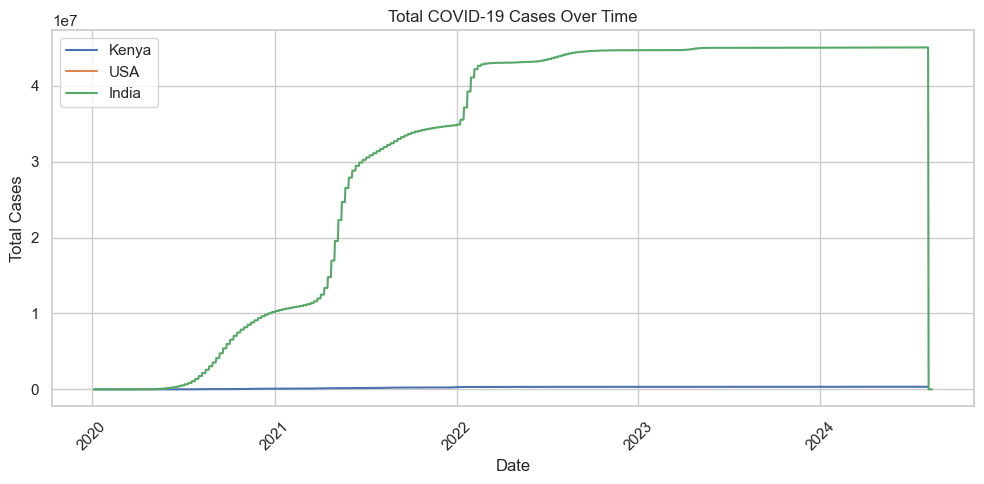

In [21]:
# 🔹 Step 5: Total COVID-19 Cases Over Time

plt.figure(figsize=(10, 5))

for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


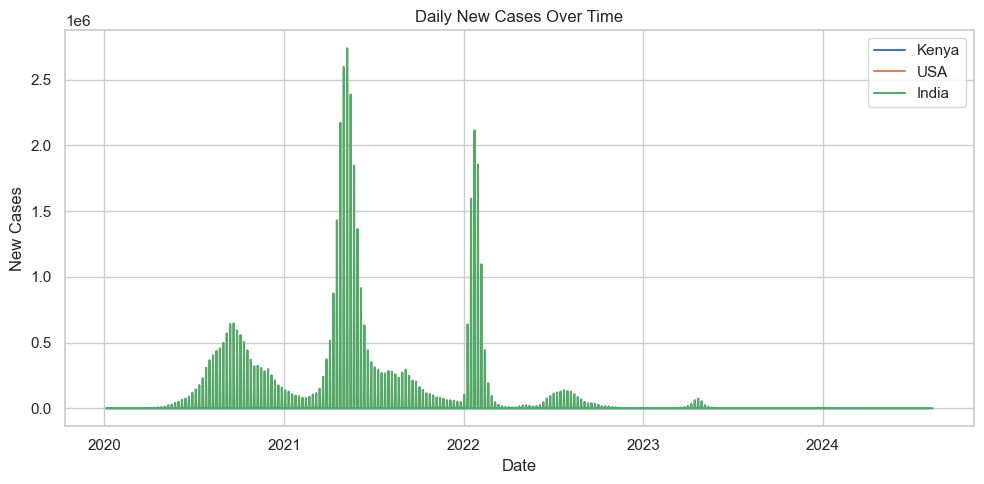

In [22]:
# 🔹 Step 6: Daily New Cases Comparison

plt.figure(figsize=(10, 5))

for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)

plt.title('Daily New Cases Over Time')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.tight_layout()
plt.show()


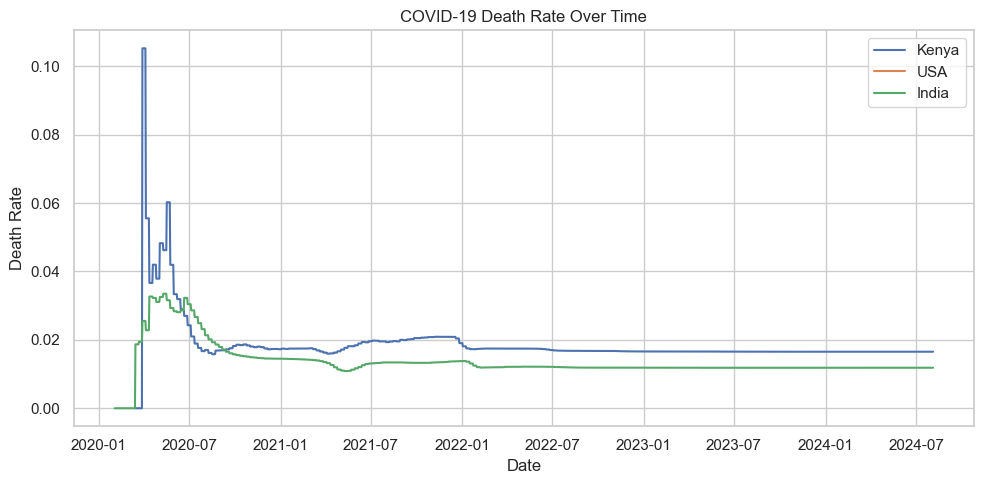

In [23]:
# 🔹 Step 7: Death Rate Calculation

df['death_rate'] = df['total_deaths'] / df['total_cases']

plt.figure(figsize=(10, 5))
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['death_rate'], label=country)

plt.title('COVID-19 Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.legend()
plt.tight_layout()
plt.show()


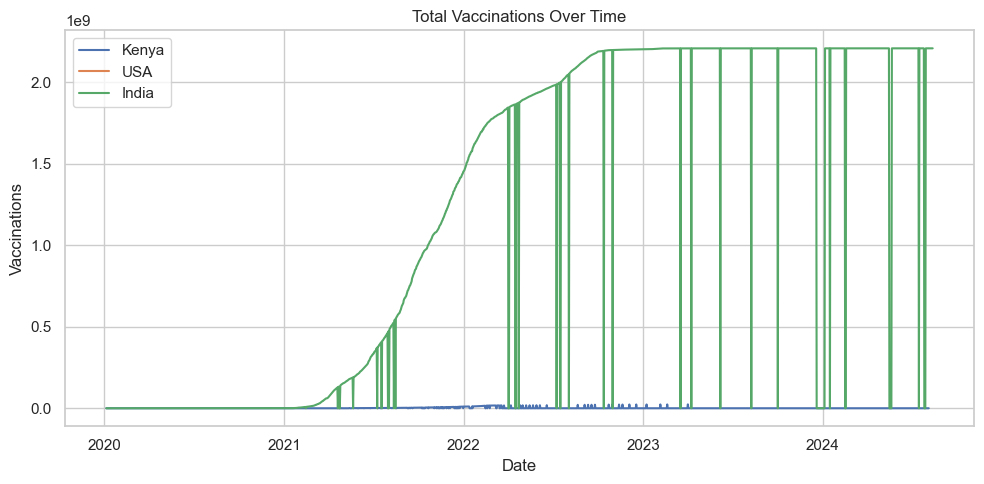

In [24]:
# 🔹 Step 8: Vaccination Progress

plt.figure(figsize=(10, 5))

for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

plt.title('Total Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Vaccinations')
plt.legend()
plt.tight_layout()
plt.show()


In [25]:
# 🔹 Step 9 (Optional): Choropleth Map of Total Cases

latest = df[df['date'] == df['date'].max()]

fig = px.choropleth(
    latest,
    locations='location',
    locationmode='country names',
    color='total_cases',
    hover_name='location',
    color_continuous_scale='Inferno',
    title='Total COVID-19 Cases by Country (Latest)'
)
fig.show()


# 🔍 Insights Summary

1. **India** had the highest total number of cases among the selected countries.
2. **USA** had early vaccine rollouts with consistently high vaccination rates.
3. **Kenya** showed lower case counts and slower vaccine distribution.
4. The **death rate** fluctuated significantly, especially in early stages.
5. There are spikes in cases indicating probable waves in all countries.

# ✅ Conclusion

This project demonstrates how we can analyze and visualize real-world health data using Python, pandas, matplotlib, seaborn, and plotly. You can extend this by adding interactive widgets or exporting the notebook as a PDF report.
